### Shapes Dataset
We present the "shapes dataset" consisting of a training set of 60,000 examples, and a test set of 10,000 examples. Each example is a 784-dimensional vector, which when reformatted as an image has the appearance of one of 3 shapes - triangle, square or pizza.

Four flat binary data files are available on this site:

Shapes_1_1_Train_Features.dat: training set features (47040000 bytes) 
Shapes_1_1_Train_Labels.dat: training set labels (60000 bytes) 
Shapes_1_1_Test_Features.dat: training set features (7840000 bytes) 
Shapes_1_1_Test_Labels.dat: training set labels (10000 bytes)

Once you import a feature file by reading in all the bytes, you must partition the data into lists of 784 elements. Each of these lists can be viewed as an image of a handwritten digit by reformatting it as a 28x28 matrix.
Questions? Email: shashi@numericinsight.com
www.numericinsight.com

### Supervised learning model - Perceptron

In [1]:
import os, struct
import matplotlib as plt
from array import array as pyarray
import pandas as pd
from openpyxl import load_workbook
from pylab import *
from numpy import *
import numpy.linalg as LA

from sklearn import linear_model
from numpy.linalg import inv


In [2]:
def load_NMNIST(dataset="training", digits=range(10), path=r'/Users/monikabansal/ucsc/MachineLearning/project/shapes_data'):
    
    if dataset == "training":
        fname_img = os.path.join(path, 'Shapes_1_1_Train_Features.dat')
        fname_lbl = os.path.join(path, 'Shapes_1_1_Train_Labels.dat')
    elif dataset == "testing":
        fname_img = os.path.join(path, 'Shapes_1_1_Test_Features.dat')
        fname_lbl = os.path.join(path, 'Shapes_1_1_Test_Labels.dat')
    else:
        raise ValueError("dataset must be 'testing' or 'training'")

    flbl = open(fname_lbl, 'rb')
    lbl = np.fromfile(flbl, dtype=np.uint8)
    flbl.close()

    fimg = open(fname_img, 'rb')
    img = np.fromfile(fimg, dtype=np.uint8)
    fimg.close()

    size=len(lbl)

    ind = [ k for k in range(size) if lbl[k] in digits ]
    N = len(ind)

    rows=28;cols=28;

    images = zeros((N, rows, cols), dtype=uint8)
    labels = zeros((N, 1), dtype=int8)
    for i in range(len(ind)):
        images[i] = array(img[ ind[i]*rows*cols : (ind[i]+1)*rows*cols ]).reshape((rows, cols))
        labels[i] = lbl[ind[i]]
    return images, labels

In [3]:
def vectortoimg(v,show=True):
    plt.imshow(v.reshape(28, 28),interpolation='None', cmap='gray')
    plt.axis('off')
    if show:
        plt.show()

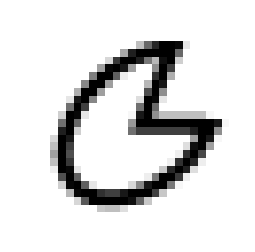

X: (60000, 784)
T: (60000, 1)


In [4]:
images, labels = load_NMNIST('training', digits=[0,1,2])

flatimages = list()
for i in images:
    flatimages.append(i.ravel())
X = asarray(flatimages) # X now contains 60000 feature vectors, each of dimension 784
T=labels # T contains class labels with 0->Triangle, 1->Square, 2->Pizza
vectortoimg(X[1])

print("X:" , X.shape)#, X[20:22,300:400])
print("T:" , T.shape)#, T)


Checking multiple training vectors by plotting images.
Be patient:


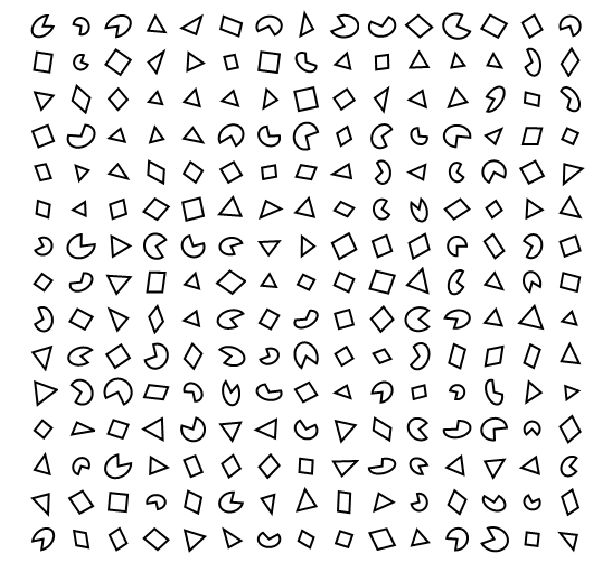

In [5]:
print("Checking multiple training vectors by plotting images.\nBe patient:")
plt.close('all')
fig = plt.figure(figsize=(10,10))
nrows=15
ncols=15
for row in range(nrows):
    for col in range(ncols):
        #print("row*ncols+col + 1", row*ncols+col + 1)
        plt.subplot(nrows, ncols, row*ncols+col + 1)
        vectortoimg(X[row*ncols+col + 1],show=False)
plt.show()

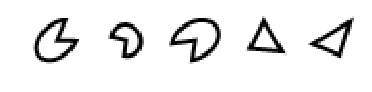

In [6]:
#Checking multiple training vectors by plotting images
def vectortoimgMlt(X,T,nrows,ncols):
    plt.close('all')
    fig = plt.figure()
    for row in range(nrows):
        for col in range(ncols):
            plt.subplot(nrows, ncols, row*ncols+col + 1)
            vectortoimg(X[row*ncols+col + 1],show=False)          
            #vectortoimg(X[np.random.randint(len(T))],show=False)
    plt.show()
    
vectortoimgMlt(X,T,1,5) # plot first 1 to 5

In [7]:
# Split result into classes - upto 5 classes

def splitDataIntoClasses(P,T):
    P1 = []
    P2 = []
    P3 = []       
    P4 = []
    P5 = []
    for i,j in enumerate(P):
        #print("i=",i , " j= ",j,"X[i]=", X[i])
        if(T[i] == 0) : 
            P1.append(j)
        elif(T[i] == 1) : 
            P2.append(j)
        elif(T[i] == 2) : 
            P3.append(j)
        elif(T[i] == 3) : 
            P4.append(j)
        else :
            P5.append(j)
    return(np.array(P1),np.array(P2),np.array(P3),np.array(P4),np.array(P5)) 

### Building XZCVPR -> to reduce from 784 dims to 2 Principal Component dims

Mean vector: (784,)
Checking min/max values for xmean: (156.24005, 255.0)


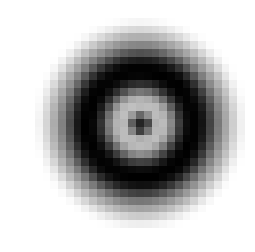

Z: (60000, 784)
Checking min/max values for Z: (-254.7701, 98.75995)


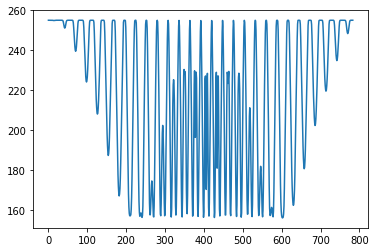

In [9]:
# Finding the Mean vector mu
xmean = np.mean(X, axis=0) #, dtype=np.float64)
print("Mean vector:", xmean.shape)

mu = xmean

print("Checking min/max values for xmean:",(np.amin(xmean),np.amax(xmean)))

vectortoimg(xmean)
plt.plot(xmean)

# Z computations Z = X - xmean
Z=X-xmean
print("Z:", Z.shape)
print("Checking min/max values for Z:",(np.amin(Z),np.amax(Z)))

#print("X vector:", X[10])
#print("Z vector:", Z[10])

# Verify Z , by computing mean vector of Z. The result must be vector of 0s 
zmean = np.mean(Z, axis=0)
#print("Mean vector of Z:", zmean) # close to 0s, but not 0


### Building XZ -> C

Shape of C:  (784, 784)
5232.550150391395
C.T == C ..
5232.550150391395


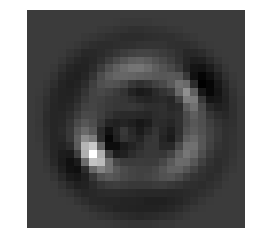

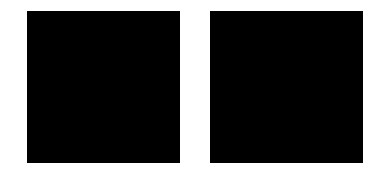

In [10]:
C=np.cov(Z,rowvar=False)
print("Shape of C: ", C.shape)
print(C[100,100])
print("C.T == C ..")
print(C.T[100,100])

vectortoimg(C[512])
vectortoimgMlt(C,C,1,2)

### Computing XZC->V , Eigen Vector V

Norm check for Eigen Vector 1: 1.0000000000000002
Norm check for Eigen Vector 2: 1.0
Dot product of 2 Eigen vectors: 2.0122792321330962e-16


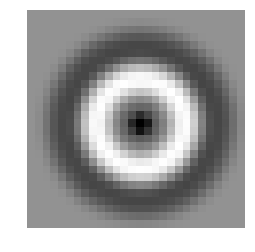

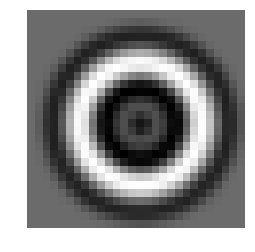

(784, 784)

In [11]:

[λ,V]=LA.eigh(C) # Compute Eigen Vector V and Eigen Value λ

#print(lamda,'\n\n',V)
row=V[-1,:];
col=V[:,-1];

#np.dot(C,row)-(λ[-1]*row) #If the matrix product C.row is the same as λ[-1]*row, this should evaluate to [0,0,0]
#np.dot(C,col)-(λ[-1]*col) #If the matrix product C.col is the same as λ[-1]*col, this should evaluate to [0,0,0]
#So we conclude that the columns of V are the eigenvectors. 

#For notational agreement with the Lecture Notes, we will set V to its own transpose. 
#We also need to reverse the order of eigenvectors and eigenvalues so that they are ordered in decreasing 
#order of importance.

λ=np.flipud(λ);
V=np.flipud(V.T);  # Transpose V and reverse the order of eigen values

row=V[0,:]; #Check once again
#np.dot(C,row)-(lamda[0]*row) #If the matrix product C.row is the same as λ[0]*row, this should evaluate to [0,0,0]

#Note that another way of checking equality of two arrays is to use np.allclose
np.allclose(np.dot(C,row),λ[0]*row)

#Norm Check. Eigen Vectors are unit vectors. Values should be 1
print("Norm check for Eigen Vector 1:" , np.linalg.norm(V[0]))
print("Norm check for Eigen Vector 2:" , np.linalg.norm(V[1]))

# Orthogonality Check, dot product of first 2 eigen vectors must be close to 0
print("Dot product of 2 Eigen vectors:" ,np.dot(V[0,:],V[1,:]))

vectortoimg(V[0])
vectortoimg(V[1])# size=3

v1 = V[0]
v2 = V[1]

V.shape # 784x784

### Computing XZCV -> P

In [39]:
P=np.dot(Z,V.T);
print(P) #Principal components

P.shape
# Compute Pred - P reduced into 2 Principal components
Pred = P[:,0:2]
print("Pred:" , Pred.shape)  # Nx2
PredM = np.mean(Pred,axis=0)  # Mean of Pred is close to 0
print("Mean of Pred:", PredM)
Pred.dtype

Pred3 = P[:,0:3]
print("Pred3:" , Pred3.shape)  # Nx3

Pred10 = P[:,0:10]
print("Pred10:" , Pred10.shape)  # Nx10



[[ 1.25954248e+03  8.39032679e+02  6.95421574e+01 ... -2.65996277e-13
   5.48478940e-12  4.68847072e-12]
 [ 7.18017489e+02 -2.65988836e+02  8.07960842e+01 ...  1.09294332e-11
   6.33034609e-12 -9.73108180e-12]
 [-2.91056701e+02 -5.33266962e+02 -4.40133730e+02 ...  5.43020543e-12
  -2.19124305e-12 -5.04296171e-12]
 ...
 [-8.00209680e+02  3.31638478e+02  2.98635512e+02 ...  4.74380972e-12
   1.65687593e-12  6.98609455e-14]
 [-2.41043473e+02 -7.73424766e+02 -3.35034145e+02 ... -1.43520928e-12
  -2.90479466e-12 -3.17212576e-12]
 [ 9.10571163e+02 -8.20679879e+02  2.41582914e+02 ...  7.98809600e-13
  -2.90005095e-12  1.79050370e-12]]
Pred: (60000, 2)
Mean of Pred: [-1.67976092e-13  2.75425312e-14]
Pred3: (60000, 3)
Pred10: (60000, 10)


### Computing XZCVP -> R (reconstructed Z)

In [13]:
R=np.dot(P,V);
print(R-Z) #Z is recovered since R-Z seems to contain very small values

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Xrec  (Reconstructed X)

In [14]:
Xrec = R + xmean;
print(Xrec-X) #X is recovered since Xrec-X seems to contain very small values

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Reconstructing X using 2 Principal components - for verification purposes

[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]
(60000, 784)


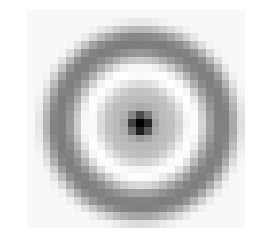

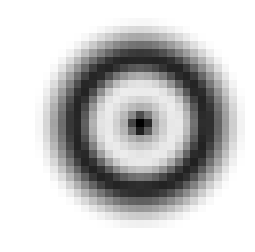

In [15]:
#Images obtained by reconstructing a few selected samples using 2 principal components

Xrec2=(np.dot(P[:,0:2],V[0:2,:])) + xmean;
print(Xrec2) #Reconstruction using 2 components

print(Xrec2.shape)  # N x d

vectortoimg(Xrec2[0])
vectortoimg(Xrec2[1])

(60000, 2)


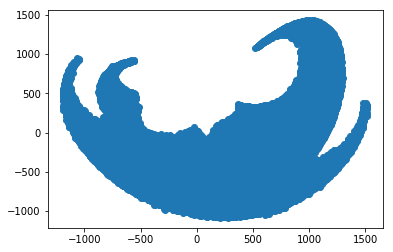

In [16]:
# Scatter plot ............
plt.scatter(Pred[:,0],Pred[:,1])
print(Pred.shape)

T= (60000, 1)
P= (60000, 784)


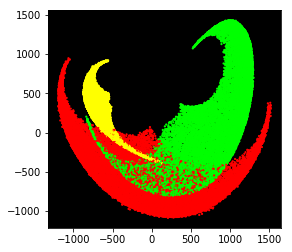

In [17]:
# Verify that they form three (mostly) separable clusters 

print("T=", T.shape)
print("P=", P.shape)
#print("T=", T) 

label0=0  # F
label1=1  # M
label2=2  # C

# Draw Scatter Plot
# For best effect, points should not be drawn in sequence but in random order
np.random.seed(0)
randomorder=np.random.permutation(np.arange(len(T)))
randomorder=np.arange(len(T))

# Set colors
cols=np.zeros((len(T),4))     # Initialize matrix to hold colors

for i,j in enumerate(T):
    if(j == label0): #Female
        cols[i]= [1,1,0,1] # 0 points are yellow (with opacity 0.25)
    elif(j == label1): #Male
        cols[i]= [1,0,0,1] # 1 points are red (with opacity 0.25)
    else:   #Children
        cols[i]= [0,1,0,1] # 2 points are green (with opacity 0.25)
        
#print("cols:",cols[1:20])

# Draw scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, facecolor='black')
ax.scatter(P[randomorder,0],P[randomorder,1],s=5,linewidths=0,facecolors=cols[randomorder,:],marker="o");
ax.set_aspect('equal')

#plt.gca().invert_yaxis()
plt.show()

# Its not clearly separable clusters. we see lot of overlap between clusters

### Load Testing dataset

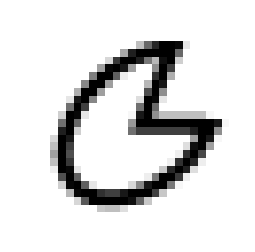

Xt: (10000, 784)
Tt: (10000, 1)


In [11]:
images, labels = load_NMNIST('testing', digits=[0,1,2])

flatimages = list()
for i in images:
    flatimages.append(i.ravel())
Xt = asarray(flatimages) # X now contains 60000 feature vectors, each of dimension 784
Tt=labels # T contains class labels with 0->Triangle, 1->Square, 2->Pizza
vectortoimg(X[1])

print("Xt:" , Xt.shape)#, X[20:22,300:400])
print("Tt:" , Tt.shape)#, T)

### Test entire Testing set by building XZCVPR -> to reduce from 784 dims to fewer Principal Component dims

In [57]:
def calculatePCforFeatureVectFromTestingSet(X, n):
    
    print("xp shape=",X.shape)

    # Transform 784 feature vector into 2 features vector using XZCVP process
    # Subtract the mean vector computed previously to calculate 𝒛=𝒙−𝝁
    # Z computations Z = X - xmean
    Z = X - mu
    print("zp:", Z.shape)

    # Verify Z , by computing mean vector of Z. The result must be vector of 0s 
    #zmean = np.mean(zp, axis=0)
    #print("Mean vector of zp:", zmean) # close to 0s, but not 0

    # Find the first two principal components of 𝒛 as {𝑝_1,𝑝_2 }=𝒛 [■8(First eigenvector@Second eigenvector)]^T
    P = np.dot(Z,V.T);
    print("pp shape", P.shape)
    #print("P", P) #Principal components

    # Compute Pred - P reduced into 2 Principal components
    Pred = P[:,0:n]
    print("ppred:" , Pred.shape)  # Nx2
    #print("ppred mean:" , np.mean(Pred,axis=0))  # Mean of Pred should be close to 0

    # Compute R (reconstructed zp)
    R = np.dot(P,V);
    #print("rp - zp : " , rp - zp) #Z is recovered since R-Z is seen to contain very small values

    # Compute xrecp (reconstructed xp) 
    xrecp = R + mu;
    #print("xrecp - xp :",xrecp - xp) #X is recovered since Xrec-X is seen to contain very small values

    return Pred

# for testing only
Pc2 = calculatePCforFeatureVectFromTestingSet(Xt, 2)#[0:5,:])
print("Pc2=", Pc2.shape)

Pc3 = calculatePCforFeatureVectFromTestingSet(Xt, 3)#[0:5,:])
print("Pc3=", Pc3.shape)

Pc10 = calculatePCforFeatureVectFromTestingSet(Xt, 10)#[0:5,:])
print("Pc10=", Pc10.shape)

Pc = calculatePCforFeatureVectFromTestingSet(Xt, 784)#[0:5,:])
print("Pc=", Pc.shape)


xp shape= (10000, 784)
zp: (10000, 784)
pp shape (10000, 784)
ppred: (10000, 2)
Pc2= (10000, 2)
xp shape= (10000, 784)
zp: (10000, 784)
pp shape (10000, 784)
ppred: (10000, 3)
Pc3= (10000, 3)
xp shape= (10000, 784)
zp: (10000, 784)
pp shape (10000, 784)
ppred: (10000, 10)
Pc10= (10000, 10)
xp shape= (10000, 784)
zp: (10000, 784)
pp shape (10000, 784)
ppred: (10000, 784)
Pc= (10000, 784)


### Apply Linear Classifiers - Perceptron on Pc2 - for 3 classes

In [8]:

# Build model with default init_params
perModel = linear_model.Perceptron(max_iter=1000,n_jobs=2,tol=0.0001, verbose=0, warm_start=False)

print("perModel:", perModel)


perModel: Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=1000, n_iter=None, n_jobs=2, penalty=None, random_state=0,
      shuffle=True, tol=0.0001, verbose=0, warm_start=False)


In [43]:

print("Pred:" , Pred.shape, Pred[0:5,0:2]) 
print("Pc2:" , Pc2.shape)

# fit a perceptron Model with 3 components
res = perModel.fit(Pred, T[:,0]).score(Pc2, Tt[:,0])
print("Perceptron fit done:", res) # 0.40
print("Perceptron coefficients:" , perModel.coef_)
print("Perceptron intercept:" , perModel.intercept_)


Pred: (60000, 2) [[1259.54247834  839.03267853]
 [ 718.01748863 -265.98883556]
 [-291.0567007  -533.26696168]
 [1090.25293859  181.17428982]
 [-801.89786283  336.04358939]]
Pc2: (10000, 2)
Perceptron fit done: 0.4502
Perceptron coefficients: [[ -298.34474209  1233.27238649]
 [-1260.68914771 -1618.8090677 ]
 [ 1427.00042752   915.14884099]]
Perceptron intercept: [-157492.  -86081.  -13617.]


### Apply Linear Classifiers - Perceptron on Pc3 and Pc10 - for 3 classes

In [49]:
print("Pred3:" , Pred3.shape, Pred3[0:5,0:2]) 
print("Pc3:" , Pc3.shape)

# fit a perceptron Model with 3 components
res3 = perModel.fit(Pred3, T[:,0]).score(Pc3, Tt[:,0])
print("Perceptron fit done:", res3) # 0.40
print("Perceptron coefficients:" , perModel.coef_)
print("Perceptron intercept:" , perModel.intercept_)


Pred3: (60000, 2) [[1259.54247834  839.03267853]
 [ 718.01748863 -265.98883556]
 [-291.0567007  -533.26696168]
 [1090.25293859  181.17428982]
 [-801.89786283  336.04358939]]
Pc3: (10000, 3)
Perceptron fit done: 0.4883
Perceptron coefficients: [[-460.97931645   49.43656192  433.4181681 ]
 [ 282.17881988 -660.70210078  407.14835784]
 [ 537.67328172  851.86168878 -713.55961702]]
Perceptron intercept: [-127369. -131830.   -4958.]


In [55]:
print("Pred10:" , Pred10.shape, Pred10[0:5,0:2]) 
print("Pc10:" , Pc10.shape)

# fit a perceptron Model with 3 components
res10 = perModel.fit(Pred10, T[:,0]).score(Pc10, Tt[:,0])
print("Perceptron fit done:", res10) # 0.40
print("Perceptron coefficients:" , perModel.coef_)
print("Perceptron intercept:" , perModel.intercept_)

Pred10: (60000, 10) [[1259.54247834  839.03267853]
 [ 718.01748863 -265.98883556]
 [-291.0567007  -533.26696168]
 [1090.25293859  181.17428982]
 [-801.89786283  336.04358939]]
Pc10: (10000, 10)
Perceptron fit done: 0.496
Perceptron coefficients: [[ -770.8320657   1079.72103648   731.6840493   -350.45975305
   -172.2845306   -620.30546315  -512.31767341  -224.89130292
    217.67820329   756.19911352]
 [ -910.69568136 -2366.50605112  -213.73770202   625.49580047
    534.19831967   210.37263496  -480.87765806  1865.4792761
    405.94780704   230.4241267 ]
 [ 1564.22450172  2671.59200951 -4925.19329917  1126.89077814
   -349.33588363   407.69864592    52.08368739 -4900.23284533
   -919.47488367  -748.94833952]]
Perceptron intercept: [ -88065. -113776.   -4043.]


### Apply Linear Classifiers - Perceptron on Pc (784) - for 3 classes

In [13]:

# fit a perceptron Model with 3 components
#res784 = perModel.fit(P, T[:,0]).score(Pc, Tt[:,0])
res784 = perModel.fit(X, T[:,0]).score(Xt, Tt[:,0])


print("Perceptron fit done:", res784) # 0.40
print("Perceptron coefficients:" , perModel.coef_)
print("Perceptron intercept:" , perModel.intercept_)

#result784 = perModel.predict(Pc)
result784 = perModel.predict(Xt)

Perceptron fit done: 0.7893
Perceptron coefficients: [[ 22440.  22440.  22440. ...  22440.  22440.  22440.]
 [-27030. -27030. -27030. ... -27030. -27030. -27030.]
 [   255.    255.    255. ...    255.    255.    255.]]
Perceptron intercept: [  88. -106.    1.]


### Apply Linear Classifiers - Logistic Regression on Pc2 - for 3 classes

In [25]:

logreg = linear_model.LogisticRegression(C=1,max_iter=1000,n_jobs=2, solver='saga',tol=0.0001, verbose=1, warm_start=False)


In [29]:
timeit -n1 -r1 (logreg.fit(Pred, T[:,0]).score(Pc2, Tt[:,0]))

convergence after 81 epochs took 10 seconds
convergence after 226 epochs took 29 seconds
convergence after 646 epochs took 43 seconds
43.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:   43.6s finished


In [30]:
# we create an instance of Neighbours Classifier and fit the data.
resLR = logreg.fit(Pred, T[:,0])
print("Logistic Regression fit done:", resLR) #0.48
resLR.score(Pc2, Tt[:,0])

convergence after 225 epochs took 28 seconds
convergence after 253 epochs took 35 seconds
convergence after 714 epochs took 67 seconds
Logistic Regression fit done: LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=2,
          penalty='l2', random_state=None, solver='saga', tol=0.0001,
          verbose=1, warm_start=False)


[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:  1.1min finished


0.4863

In [37]:
LR_result = logreg.predict(Pc2)
print(LR_result.shape, LR_result)

(10000,) [2 2 2 ... 0 0 0]


### Compare LR result with actuals

In [38]:

def compareResults(X,T):
    TP = 0;
    
    for i,val in enumerate(X):
        if(X[i] == T[i]):
            TP = TP + 1
    return [TP, len(X)]      
    
print("Accuracy Results:", compareResults(LR_result,Tt))

# Max Accuracy obtained is [4863, 10000]
        

Accuracy Results: [4863, 10000]


### Separate out classes 

res784: [2 1 1 2 1]
P test sample count for class 0,1,2: 2551 3880 3569


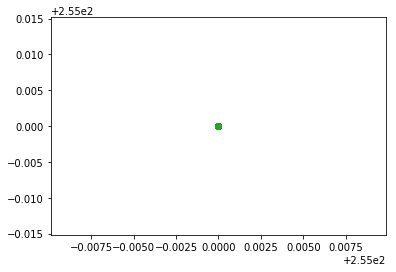

In [17]:
print("res784:",result784[0:5])

#[P1, P2, P3, P4, P5] = splitDataIntoClasses(Pc,result784)
[P1, P2, P3, P4, P5] = splitDataIntoClasses(Xt,result784)

#print("Pc:" ,Pc.shape, Pc)

#print("P1:", P1[0:1])
#print("P2:" ,P2[0:1])
#print("P3:" ,P3[0:1])
print("P test sample count for class 0,1,2:", len(P1), len(P2), len(P3))

# Scatter plot ............
#plt.scatter(Pred[:,0],Pred[:,1])
plt.scatter(P1[:,0],P1[:,1])
plt.scatter(P2[:,0],P2[:,1])
plt.scatter(P3[:,0],P3[:,1])

### Plot all classes from Testing set

Checking multiple testing vectors by plotting images.
Be patient:


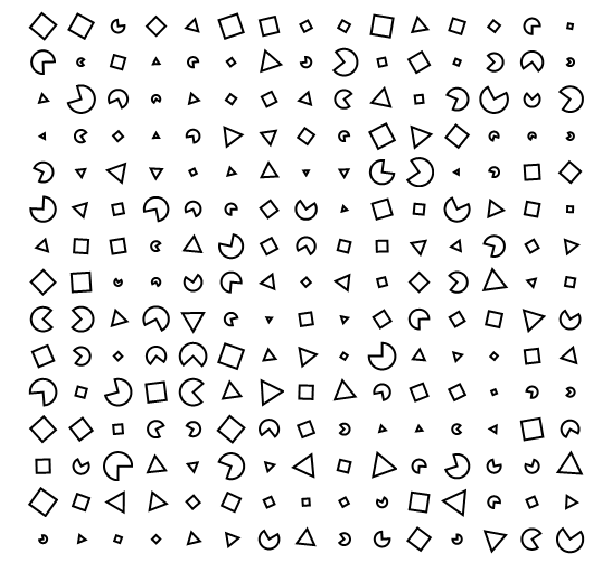

In [18]:
print("Checking multiple testing vectors by plotting images.\nBe patient:")
plt.close('all')
fig = plt.figure(figsize=(10,10))
nrows=15
ncols=15
for row in range(nrows):
    for col in range(ncols):
        #print("row*ncols+col + 1", row*ncols+col + 1)
        plt.subplot(nrows, ncols, row*ncols+col + 1)
        vectortoimg(Xt[row*ncols+col + 1],show=False)
        #vectortoimg(X[np.random.randint(len(T))],show=False)
plt.show()

### Plot results to visualize 3 class distribution

EM predicted class 0 result
Checking multiple training vectors by plotting images for class: 0 
Be patient:
T.shape (10000,)


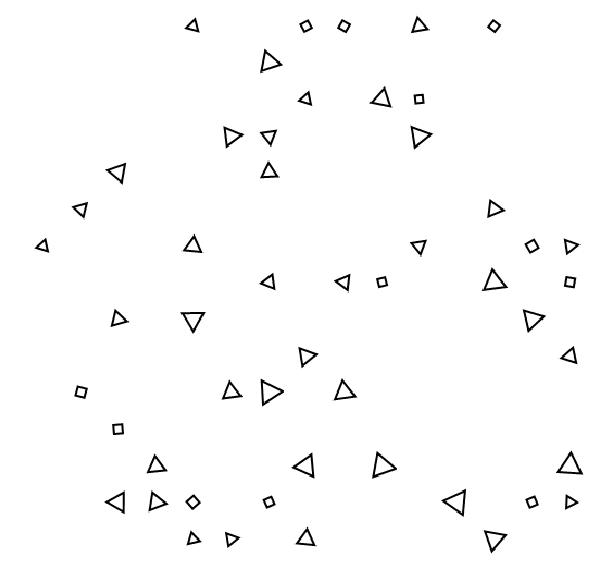

Actual class o result
Checking multiple training vectors by plotting images for class: 0 
Be patient:
T.shape (10000, 1)


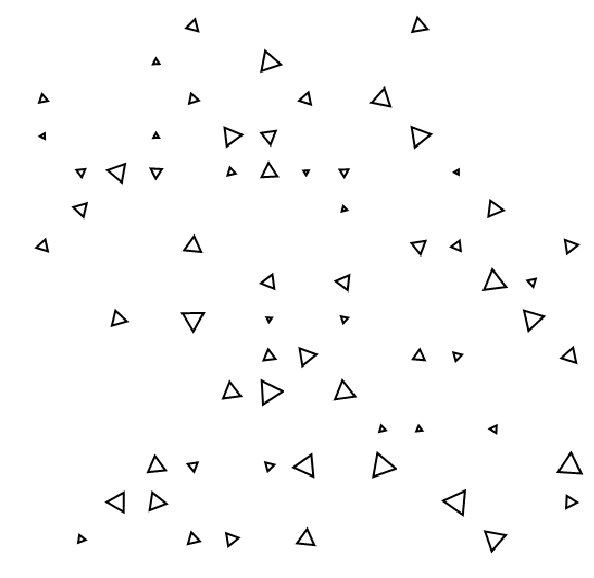

EM predicted class 1 result
Checking multiple training vectors by plotting images for class: 1 
Be patient:
T.shape (10000,)


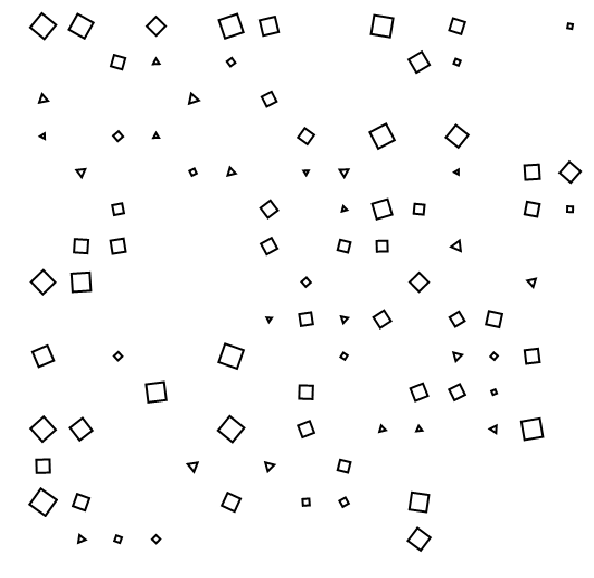

Actual class 1 result
Checking multiple training vectors by plotting images for class: 1 
Be patient:
T.shape (10000, 1)


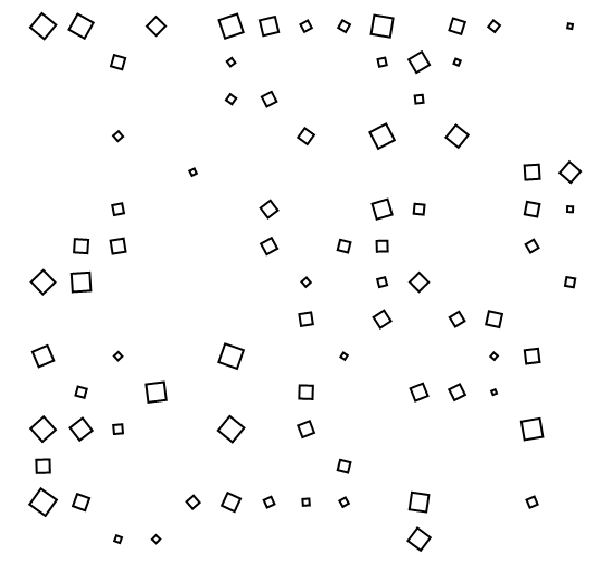

EM predicted class 2 result
Checking multiple training vectors by plotting images for class: 2 
Be patient:
T.shape (10000,)


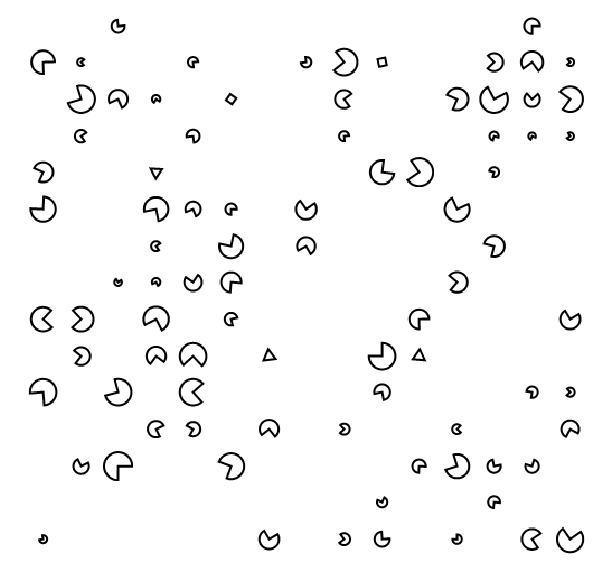

Actual class 2 result
Checking multiple training vectors by plotting images for class: 2 
Be patient:
T.shape (10000, 1)


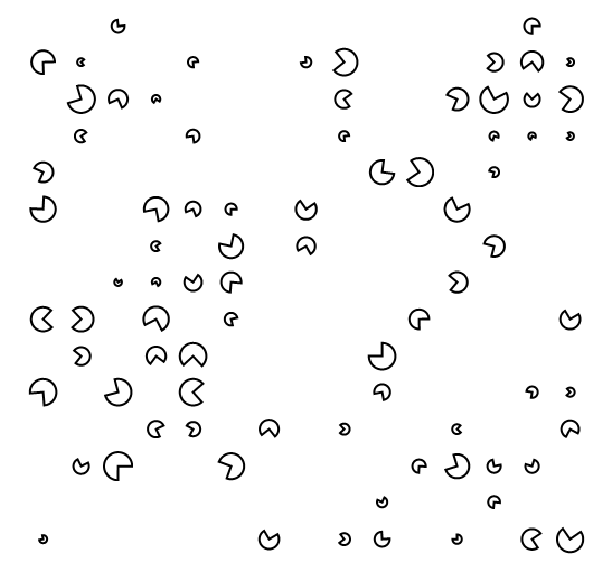

In [19]:
#Checking multiple training vectors by plotting images - for a class
def vectortoimgMlt(X,T,nrows,ncols,classLabel):
    print("Checking multiple training vectors by plotting images for class:",classLabel,"\nBe patient:")
    print("T.shape", T.shape)
    plt.close('all')
    fig = plt.figure(figsize=(10,10))
    for row in range(nrows):
        for col in range(ncols):
            if(classLabel == T[row*ncols+col + 1]):
                #print(T[row*ncols+col + 1], row*ncols+col + 1)
                plt.subplot(nrows, ncols, row*ncols+col + 1)
                vectortoimg(X[row*ncols+col + 1],show=False)
    plt.show()

print("Perceptron predicted class 0 result") 
vectortoimgMlt(Xt,result784,15,15,0)
print("Actual class o result")
vectortoimgMlt(Xt,Tt,15,15,0)

print("Perceptron predicted class 1 result") 
vectortoimgMlt(Xt,result784,15,15,1)
print("Actual class 1 result")
vectortoimgMlt(Xt,Tt,15,15,1)

print("Perceptron predicted class 2 result") 
vectortoimgMlt(Xt,result784,15,15,2)
print("Actual class 2 result")
vectortoimgMlt(Xt,Tt,15,15,2)